In [29]:
import numpy as np
from matplotlib import pyplot as plt

In [31]:
def shift_functions(delta_x, delta_y):
    func_shift = lambda A: np.roll(A, (delta_x, delta_y), axis=(0, 1))
    func_unshift = lambda A: np.roll(A, (-delta_x, -delta_y), axis=(0, 1))
    return func_shift, func_unshift

def show_img(A, ax):
    ax.grid()
    ax.set_xticks(np.arange(-.5, A.shape[1]))
    ax.set_xticklabels(range(A.shape[1] + 1))
    ax.set_yticks(np.arange(-.5, A.shape[0]))
    ax.set_yticklabels(range(A.shape[0] + 1))
    ax.imshow(A)

def preview_action_pair_result(source_img, action_pair):
    func, inv_func = action_pair
    fig, axes = plt.subplots(1, 2, figsize=(12, 8))
    
    B = func(source_img)
    show_img(B, axes[0])
    
    C = inv_func(B)
    show_img(C, axes[1])
    plt.show()

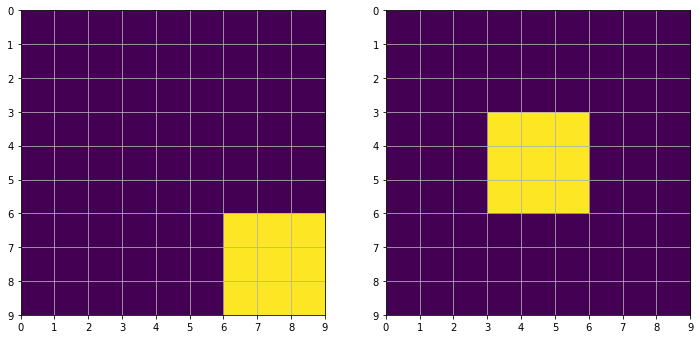

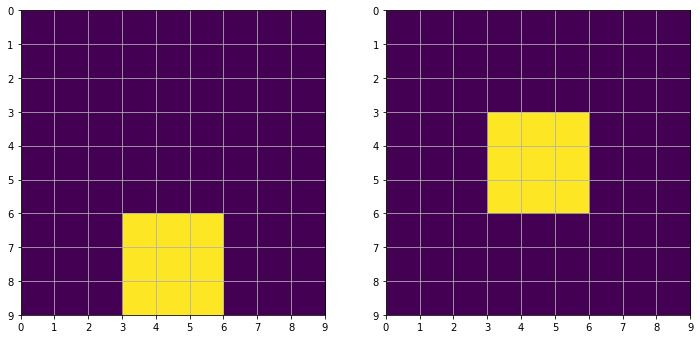

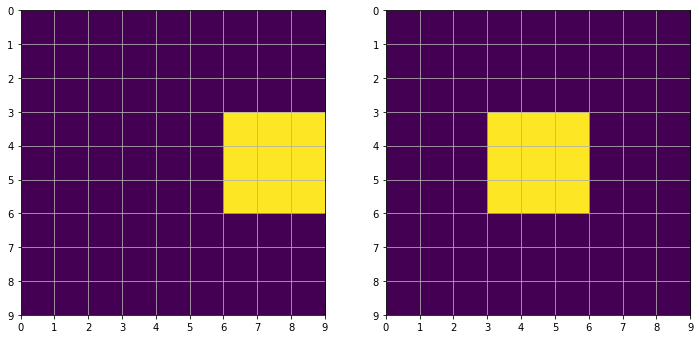

In [32]:
a = np.ones((3, 3))
A = np.zeros((9, 9))
A[3:6, 3:6] = a

filter_candidates = [shift_functions(*delta) for delta in [(3, 3), (3, 0), (0, 3)]]

for filt in filter_candidates:
    preview_action_pair_result(A, filt)

### 上記の復元処理候補で正しいものをAgentが選べるようになるかを確認する。
* まず`train_agent.py`のファイルを書き換えて復元処理の候補を渡せるようにすることが必要である。
* 学習結果は学習結果用の場所に保存していく。